# Проверка гипотез о параметрах нормального распределения

## 0. Подготовка

### 0.1 Импорт нужных библиотек

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import Markdown as md
import math

### 0.2 Импорт выборки

In [4]:
df = pd.read_csv ('lab5_data.csv', sep=';', header=None, decimal=",")
df = df.astype('float')
pd.set_option('display.expand_frame_repr', False)

heading_properties = [('font-size', '18px')]
cell_properties = [('font-size', '14px')]

dfstyle = [dict(selector="th", props=heading_properties), dict(selector="td", props=cell_properties)]

df.style.set_table_styles(dfstyle)

print(df)

        0      1       2      3      4      5      6      7      8      9
0 -12.953 -6.924  -3.899 -5.577 -1.907 -7.126 -2.946 -5.936 -8.230 -7.434
1   1.866 -7.803 -11.133 -4.278 -3.778 -7.213 -4.846 -8.924 -2.306 -4.360
2  -1.266  0.274  -4.223 -4.767 -1.447 -2.341  3.133 -3.707 -6.248 -1.714
3  -5.386 -3.212 -11.145 -6.166 -3.878 -1.743 -4.606 -2.666 -4.795 -2.660
4  -3.798 -2.742  -3.989 -7.383 -5.028 -4.380 -2.598 -7.183 -4.557 -3.034
5  -7.432 -7.505  -3.089 -5.018  0.633 -7.363 -1.919 -6.944 -1.967 -7.336
6  -2.767 -6.135  -3.173 -2.852 -7.748 -1.776 -4.381 -5.021  0.088 -4.151
7  -4.699 -1.634  -4.809  1.433 -2.706 -6.897 -1.722 -4.494 -9.873 -3.988


### 0.3 Крайние члены вариационного ряда и размах выборки

In [5]:
n = df.shape[0] * df.shape[1]
print('Количество элементов n:', n)

Количество элементов n: 80


In [6]:
df_min = df.to_numpy().min()
md('$X_{{(1)}} = {}$'.format(df_min))


$X_{(1)} = -12.953$

In [7]:
df_max = df.to_numpy().max()
md('$X_{{(n)}} = X_{} = {}$'.format('{{({})}}'.format(n), df_max))

$X_{(n)} = X_{(80)} = 3.133$

In [8]:
df_diff = df_max - df_min
md('$\omega = X_{{(n)}} - X_{{(1)}} = {}$'.format(df_diff))

$\omega = X_{(n)} - X_{(1)} = 16.086$

### 0.4 Группировка данных

#### 0.4.1 Находим число интервалов

In [9]:
l = math.trunc(1 + np.log2(n))
print('Количество интервалов l = {}'.format(l))

Количество интервалов l = 7


#### 0.4.2 Находим шаг интервалов

In [10]:
h = df_diff / l
print('Размер интервалов h = {}'.format(h))

Размер интервалов h = 2.2979999999999996


#### 0.4.3 Построение интервалов

Для построения гистограммы нам понадобится сначала столбец средних точек на каждом интервале:

In [11]:
intervals = [(round(df_min + i * h, 3), round(df_min + (i + 1) * h, 3)) for i in range(l)]
intervals

[(-12.953, -10.655),
 (-10.655, -8.357),
 (-8.357, -6.059),
 (-6.059, -3.761),
 (-3.761, -1.463),
 (-1.463, 0.835),
 (0.835, 3.133)]

In [12]:
histogram = pd.DataFrame()
interval_rows = ['[{}, {})'.format(val[0], val[1]) for val in intervals]
interval_rows[l - 1] = '[{}, {}]'.format(intervals[l - 1][0], intervals[l - 1][1])
histogram['Интервалы'] = interval_rows
histogram['Середины интервалов'] = [(val[0] + val[1]) / 2 for val in intervals]
histogram

,Интервалы,Середины интервалов
0,"[-12.953, -10.655)",-11.804
1,"[-10.655, -8.357)",-9.506
2,"[-8.357, -6.059)",-7.208
3,"[-6.059, -3.761)",-4.910
4,"[-3.761, -1.463)",-2.612
5,"[-1.463, 0.835)",-0.314
6,"[0.835, 3.133]",1.984


Ну а дальше нужно посчитать количество точек, которые входят в каждый из интервалов:

In [13]:
histogram['Количество точек'] = [0 for i in range(l)]

for i in range(df.shape[0]):
    for j in range(df.shape[1]):
        value = float(df.at[i, j])
        for k in range(l):
            if value >= intervals[k][0] and value < intervals[k][1]:
                histogram.iat[k, 2] += 1
                break
                
        if value == intervals[l - 1][1]:
            histogram.iat[l - 1, 2] += 1
histogram

,Интервалы,Середины интервалов,Количество точек
0,"[-12.953, -10.655)",-11.804,3
1,"[-10.655, -8.357)",-9.506,2
2,"[-8.357, -6.059)",-7.208,18
3,"[-6.059, -3.761)",-4.910,26
4,"[-3.761, -1.463)",-2.612,23
5,"[-1.463, 0.835)",-0.314,5
6,"[0.835, 3.133]",1.984,3


Убедимся, что все точки вошли в интервалы:

In [14]:
print('Количество точек: {}'.format(histogram['Количество точек'].sum()))

Количество точек: 80


Посчитаем относительные частоты:

In [15]:
histogram['Относительная частота'] = histogram['Количество точек'] / n
histogram

,Интервалы,Середины интервалов,Количество точек,Относительная частота
0,"[-12.953, -10.655)",-11.804,3,0.0375
1,"[-10.655, -8.357)",-9.506,2,0.0250
2,"[-8.357, -6.059)",-7.208,18,0.2250
3,"[-6.059, -3.761)",-4.910,26,0.3250
4,"[-3.761, -1.463)",-2.612,23,0.2875
5,"[-1.463, 0.835)",-0.314,5,0.0625
6,"[0.835, 3.133]",1.984,3,0.0375


#### 0.4.4 Построение гистограммы относительных частот

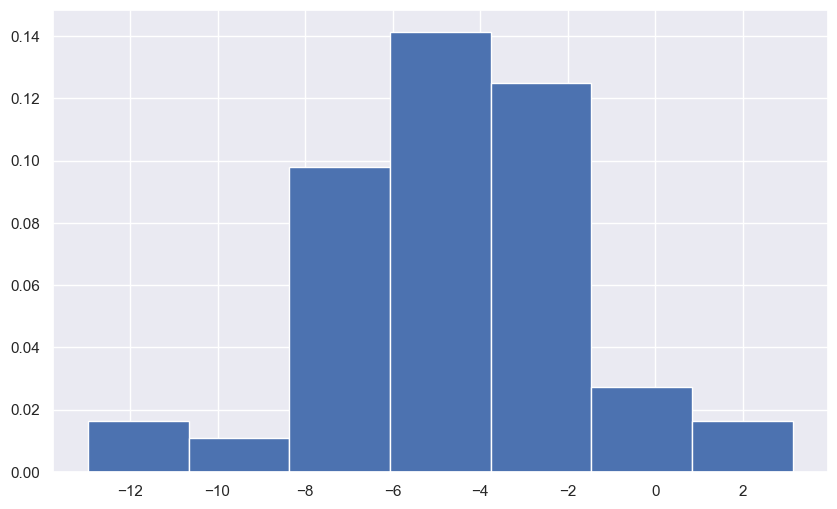

In [16]:
import seaborn as sns
sns.set_theme()
plt.figure(figsize=(10,6))
x = histogram['Середины интервалов']
y = [i / h for i in histogram['Относительная частота']]
plt.bar(x, y, width=h)
plt.show()

#### 0.4.5 Выборочные характеристики

Выборочное среднее

In [17]:
x_mean = 0
for i in range(df.shape[0]):
    for j in range(df.shape[1]):
        value = float(df.at[i, j])
        x_mean += value
        
x_mean /= n
md('Выборочное среднее <ins>X</ins> = {}'.format(round(x_mean, 3)))

Выборочное среднее <ins>X</ins> = -4.428

Выборочная дисперсия

In [18]:
s_2 = 0

for i in range(df.shape[0]):
    for j in range(df.shape[1]):
        value = float(df.at[i, j])
        s_2 += (value - x_mean) ** 2
        
s_2 /= (n - 1)
md('Выборочная дисперсия $S^2$ = {}'.format(round(s_2, 3)))

Выборочная дисперсия $S^2$ = 8.533

### 0.5 Константы

In [19]:
alpha = 0.04
a_0 = -4
sigma_0 = 2
a_1 = -4.5
sigma_1 = 2.7
eps = 0.15
n = 80

## 	1. Постройте критерий $S_2$ уровня α и проверьте гипотезу $H_0$: a=$-4$  против  односторонней альтернативы  $H_2$, если σ неизвестно

#### Построим критерий $S_2$ уровня a и проверим гипотезу $H_0:$ a = -4 против левосторонней альтернативы $H_2: a < -4$ если σ неизвестно

#### Критическое множество для среднего при альтернативе $H_2$:$a<a_0$ имеет вид:

$$S_2 = \{\overline{x} < C_2\}$$

#### Рассмотрим статистику:

$$\frac{\overline{x} - a_0}{\sqrt{s^2}} \sqrt{n} \sim{} t(n - 1)$$

#### Тогда по определению ошибки 1 рода a = $P(S_2 | H_0)$:

$$\alpha = P(\overline{x} < C_2 | a = a_0) = P\left(\frac{\overline{x} - a_0}{\sqrt{s^2}} \sqrt{n} < \frac{\overline{C_2} - a_0}{\sqrt{s^2}} \sqrt{n}\right) = F_{t(n-1)}\left(\frac{\overline{C_2} - a_0}{\sqrt{s^2}} \sqrt{n}\right) \rightarrow \frac{C_2 - a_0}{\sqrt{s^2}} = t_{\alpha}(n - 1)$$

#### Выразим $C_2:$

In [20]:
from scipy.stats import t

C_2 = a_0 + t.ppf(alpha, n - 1) * np.sqrt(s_2) / np.sqrt(n)
md('$$C_2 = a_0 + \\frac{{t_{{\\alpha}}(n - 1)}}{{\\sqrt{{n}}}} * s = {}$$'.format(round(C_2, 5)))

$$C_2 = a_0 + \frac{t_{\alpha}(n - 1)}{\sqrt{n}} * s = -4.57922$$

In [21]:
md('''Следовательно, гипотеза $H_0:$a = -4 принимается, потому что $\overline{{x}} = {}$ не принадлежит
   критическому множеству $S_2$ = {{$\overline{{x}} < {}$}}'''.format(round(x_mean, 5), round(C_2, 5)))

Следовательно, гипотеза $H_0:$a = -4 принимается, потому что $\overline{x} = -4.42759$ не принадлежит
   критическому множеству $S_2$ = {$\overline{x} < -4.57922$}

## 2. Постройте критерий $S_3$ уровня α и проверьте гипотезу $H_01$: σ=$2$  против  альтернативы $H_3$, если a неизвестно

#### Критическое множество для среднего квадратичного отклонения при альтернативе $H_3: \sigma > 2$ имеет вид:

$$S_3 = \{s^2 > C_3\}$$

#### Рассмотрим статистику:

$$\frac{(n - 1) s^2}{\sigma^2} \sim \chi^2(n - 1)$$

#### Тогда по определению ошибки 1 рода a = $P(S_3 | H_1)$:

$$\alpha = P (s^2 > C_3 | \sigma = \sigma_0) = P\left(\frac{(n - 1)s^2}{\sigma_0^2} > \frac{(n-1)C_3}{\sigma_0^2}\right)=1-
\chi^2_{(n-1)}\left(\frac{(n-1)s^2}{\sigma_0^2}\right) \rightarrow \frac{(n - 1)C_3}{\sigma_0^2} = \chi^2_{1-\alpha} (n - 1)$$

#### Выразим $C_3:$

In [22]:
from scipy.stats import chi2

C_3 = sigma_0 ** 2 / (n - 1) * chi2.ppf(1-alpha, n - 1)
md('$$C_3 = \\frac{{\sigma_0^2}}{{n - 1}} * \chi^2_{{\\alpha}}(n - 1) = {}$$'.format(round(C_3, 5)))

$$C_3 = \frac{\sigma_0^2}{n - 1} * \chi^2_{\alpha}(n - 1) = 5.18074$$

In [23]:
md('''Следовательно, гипотеза $H_3:\sigma = 2.7$ отклоняется, потому что $s^2 = {}$ принадлежит
   критическому множеству $S_3$ = {{$s^2 > {}$}}'''.format(round(s_2, 5), round(C_3, 5)))

Следовательно, гипотеза $H_3:\sigma = 2.7$ отклоняется, потому что $s^2 = 8.53317$ принадлежит
   критическому множеству $S_3$ = {$s^2 > 5.18074$}

## 3. Постройте оптимальный критерий $S_1$ уровня α и проверьте $H_0$ против простой альтернативы $H_1$:a=$-4.5$, если σ=$2.7$ известно

#### Воспользуемся критерием Неймана - Пирсона:

$$S_1 = \left\{\frac{L(X_1 ... X_n, a_1)}{L(X_1 ... X_n, a_0)} > C_4\right\}$$

$$L(X_1 ... X_n, a) = \prod\limits_{k = 1}\limits^{n} \frac{1}{\sqrt{2 \pi} \sigma_1} e^{\frac{-(X_k-a)^2}{2\sigma_1^2}}$$

$$\frac{L(X_1 ... X_n, a_1)}{L(X_1 ... X_n, a_0)} = e ^ {\left(\sum\limits_{k = 1}\limits^{n} \frac{-(X_k-a_1)^2}{2\sigma_1^2} \right)+ \left(\sum\limits_{k = 1}\limits^{n} \frac{-(X_k-a_0)^2}{2\sigma_1^2}\right)} = e ^ {\frac{1}{2 \sigma_1^2} (\sum\limits_{k = 1}\limits^{n} 2X_k a_1 - \sum\limits_{k = 1}\limits^{n} 2X_k a_0 - na_1^2 + na_0^2)} > C_4$$

#### Получаем, что:

$$\sum\limits_{k = 1}\limits^{n} 2X_k a_1 - \sum\limits_{k = 1}\limits^{n} 2X_k a_0 - na_1^2 + na_0^2 > 2ln(C_4)\sigma_1^2 $$

$$2(a_1 - a_0) \sum\limits_{k = 1}\limits^{n} X_k > 2ln(C_4)\sigma_1^2 + na_1^2 - na_0^2$$

$$\sum\limits_{k = 1}\limits^{n} X_k > \frac{ln(C_4)\sigma_1^2}{a_1 - a_0} + \frac{n(a_1 + a_0)}{2}$$

$$\overline{x} > \frac{ln(C_4)\sigma_1^2}{n(a_1 - a_0)} + \frac{(a_1 + a_0)}{2} = C_5$$

#### Таким образом получим критическое множество:

 $$S_1=\{\overline{x} > C_5\}$$

#### Рассмотрим статистику:

$$\frac{\overline{x} - a_0}{\sigma_1} \sqrt{n} \sim{} N(0, 1)$$

#### Тогда по определению ошибки 1 рода a = $P(S_1 | H_0)$:

$$\alpha = P(\overline{x} < C_5 | a = a_0) = P \left(\frac{\overline{x} - a_0}{\sigma_1} \sqrt{n} < \frac{C_5 - a_0}{\sigma_1} \sqrt{n} \right) = Ф\left(\frac{C_5 - a_0}{\sigma_1} \sqrt{n}\right) \rightarrow \frac{C_5 - a_0}{\sigma_1} \sqrt{n} = u_{\alpha}$$

#### Выразим $C_5$:

In [24]:
from scipy.stats import norm

C_5 = a_0 + norm.ppf(alpha) * sigma_1 / np.sqrt(n)
md('$$C_5 = a_0 + \\frac{{u_{{1 - \\alpha}}}}{{\\sqrt{{n}}}} \sigma_1 = {}$$'.format(round(C_5, 5)))

$$C_5 = a_0 + \frac{u_{1 - \alpha}}{\sqrt{n}} \sigma_1 = -4.52848$$

In [25]:
md('''Следовательно, гипотеза $H_0:a = -4$ принимается, потому что $\overline{{x}} = {}$ не принадлежит
   критическому множеству $S_1$ = {{$\overline{{x}} > {}$}}'''.format(round(x_mean, 5), round(C_5, 5)))

Следовательно, гипотеза $H_0:a = -4$ принимается, потому что $\overline{x} = -4.42759$ не принадлежит
   критическому множеству $S_1$ = {$\overline{x} > -4.52848$}

## 	4. Найдите ошибку второго рода  $β=P(\overline{S_1}│H_1 )$ критерия $S_1$

#### Найдём ошибку второго рода $\beta = P(\overline{S_1} | H_1)$ критерия $S_1 = \{\overline{x} < -4.579\}$. Согласно определению ошибки второго рода:

In [26]:
from scipy.stats import norm

res = 1 - norm.cdf((C_5 - a_1) / sigma_1 * np.sqrt(n))
res

0.5375802320469667

In [27]:
md('''$\\beta = P(\\overline{{x}} > C_5 | a = a_1)
= P \\left(\\frac{{\\overline{{x}} - a_1}}
{{\\sigma_1}} \\sqrt{{n}} > \\frac{{C_5 - a_1}}{{\\sigma_1}} \\sqrt{{n}} \\right) = 1 - Ф\\left(\\frac{{C_5 - a_1}}{{\\sigma_1}} 
\\sqrt{{n}}\\right)$ = {}'''.format(round(res, 5)))

$\beta = P(\overline{x} > C_5 | a = a_1)
= P \left(\frac{\overline{x} - a_1}
{\sigma_1} \sqrt{n} > \frac{C_5 - a_1}{\sigma_1} \sqrt{n} \right) = 1 - Ф\left(\frac{C_5 - a_1}{\sigma_1} 
\sqrt{n}\right)$ = 0.53758

## 5. Найдите такие значения $a_1$, для которых ошибка второго рода критерия $S_1$ не превосходит ε

#### Оптимальное значение $a_1$, при котором ошибка второго рода не превышает $\varepsilon$, можно вычислить по формуле:

$$\beta = P(x_{mean} > C_5)| a = a_1') = P(\frac{x_{mean} - a_1'}{\sigma_1}\sqrt{n} > \frac{C_5-a_1'}{\sigma_1}\sqrt{n}) =1 - \Phi(\frac{C_5-a_1'}{\sigma_1}\sqrt{n}) = \epsilon$$

$$\frac{C_5-a_1'}{\sigma_1}\sqrt{n} = u_{1 - \epsilon}$$

In [31]:
from scipy.stats import norm

res = C_5 - norm.ppf(1 - eps) / np.sqrt(n) * sigma_1

md('$a_1$ = $C_5 - \\frac{{u_{{\\varepsilon}}}}{{\\sqrt{{n}}}}*\sigma_1$ = {}'.format(round(res, 5)))

$a_1$ = $C_5 - \frac{u_{\varepsilon}}{\sqrt{n}}*\sigma_1$ = -4.84135

## 6. Постройте совмещенные графики гистограммы относительных частот данной выборки и плотностей нормального распределения с параметрами $(a_0,σ_1 )$ и $(a_1,σ_1 )$. 

#### Совмещённые графики:

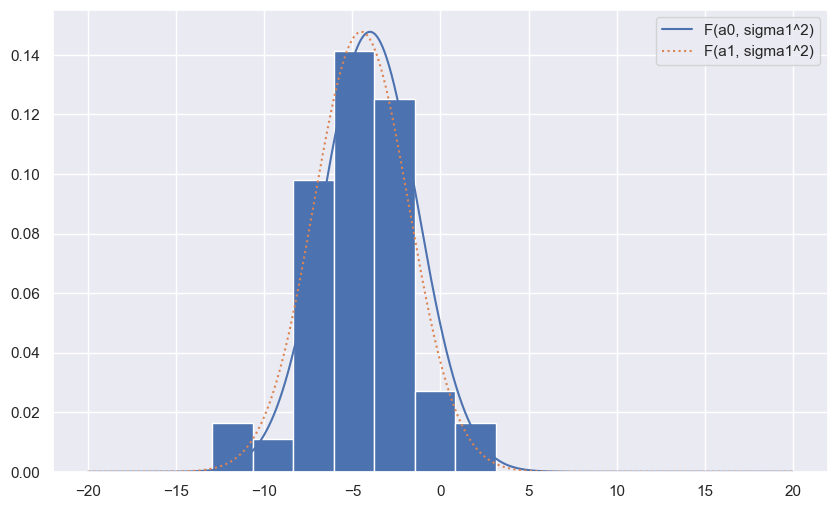

In [29]:

import seaborn as sns
sns.set_theme()
plt.figure(figsize=(10,6))
x = histogram['Середины интервалов']
y = [i / h for i in histogram['Относительная частота']]
plt.bar(x, y, width=h)

x_arr = np.arange(-20, 20, 0.0001)
plt.plot(x_arr, norm.pdf(x_arr, a_0, sigma_1), label='F(a0, sigma1^2)')
plt.plot(x_arr, norm.pdf(x_arr, a_1, sigma_1), label='F(a1, sigma1^2)', linestyle = 'dotted')
plt.legend()
plt.show()

## 7. Выводы

#### В процессе выполнения задания мы освоили этапы первоначальной обработки статистических данных и изучили основные понятия, связанные с этой темой. 

#### Мы научились по заданной выборке составлять интервальный вариационный ряд, который является результатом группировки данных, а также вычислять выборочное среднее и среднее квадратичное отклонение выборки. На следующем этапе был разобран способ построения гистограммы относительных частот. 

#### Затем, были посчитаны критические множества для среднего и среднего квадратичного отклонения, а также проверены 3 гипотезы с разными альтернативами. Была найдена ошибка второго рода для критерия $S_1$ и такое значение параметра $a$, при котором ошибка второго рода критерия $S_1$ не превосходит $ε$. 

#### Также были построены совмещенные графики гистограммы относительных частот x и плотностей нормального распределения $N(a_0,σ_1 )$ и $N(a_1,σ_1 )$. По графику видно, что кривая плотности нормального закона для альтернативы H_1:a=-4.5 лучше ложится на гистограмму, чем в случае основной гипотезы H_0:a=-4, что можно объяснить высокой вероятностью ошибки второго рода.